In [267]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Load the data

In [268]:
traindf = pd.read_csv("train.csv", encoding="utf-8")
traindf.head()
# sibsp: siblings / spouses aboard the Titanic
# parch: parents / children aboard the Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
testdf = pd.read_csv("test.csv", encoding="utf-8")
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [270]:
print(traindf.shape) 
print(testdf.shape)

(891, 12)
(418, 11)


## Exploratory data analysis

### Relationship between survived & Sex

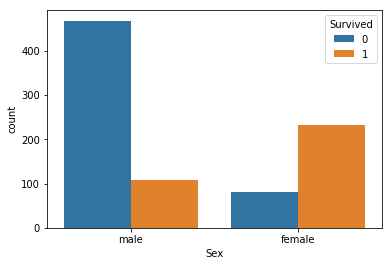

In [271]:
sns.countplot(traindf['Sex'], hue = traindf['Survived'])

### Relationship between survived & Embarked, Pclass, Sex

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


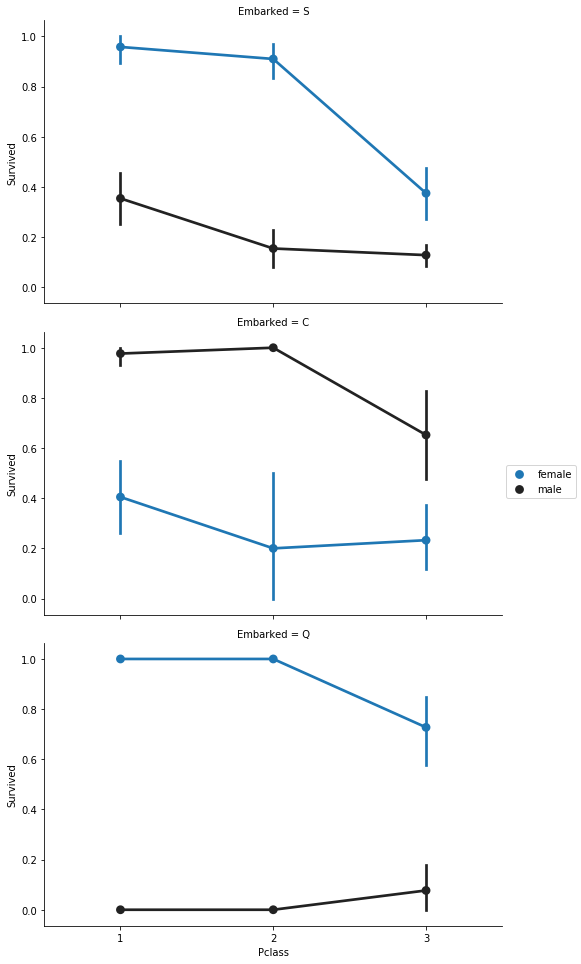

In [272]:
FacetGrid = sns.FacetGrid(traindf, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

### Relatinoship between Pclass and Survived 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


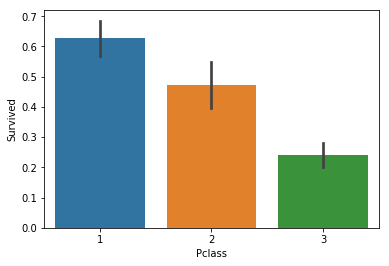

In [273]:
sns.barplot(x='Pclass', y='Survived', data=traindf)

### Relatinoship between Pclass, Age and Survived 

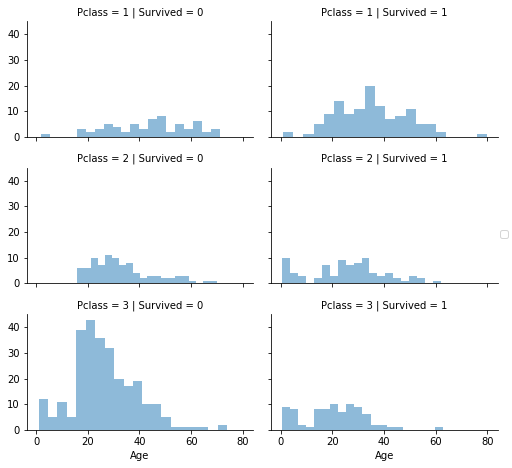

In [274]:
grid = sns.FacetGrid(traindf, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

## Handle Missing Values 

### Concat traindf & testdf 

In [275]:
df = traindf.append(testdf)
df = df.drop('Survived',axis=1)
print(df.shape)

(1309, 11)


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [277]:
df.describe(include = 'all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,NaN


In [278]:
df.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64

In [279]:
total = df.isna().sum().sort_values(ascending=False)
percent_1 = df.isna().sum()/df.isna().count()*100
percent_2 = (round(percent_1, 2))

In [280]:
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Age,263,20.09
Cabin,1014,77.46
Embarked,2,0.15
Fare,1,0.08
Name,0,0.00
Parch,0,0.00
PassengerId,0,0.00
Pclass,0,0.00
Sex,0,0.00
SibSp,0,0.00


### Fill missing value- numerical

In [281]:
# fill numericla missing values with median

In [282]:
med = df.median()
df = df.fillna(med) # Only apply to columns belong to numerical type 
df.isna().sum()

Age               0
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64

### Fill missing value- categorical

In [283]:
# fill missing values(Embarked) with the most common one

In [284]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [285]:
most = df["Embarked"].value_counts().idxmax()
most

'S'

In [286]:
df["Embarked"] = df["Embarked"].fillna(most)
df.isna().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64

## One-Hot Encoding

In [287]:
dummy = pd.get_dummies(df["Embarked"])
df = pd.concat([df, dummy], axis=1) 
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,C,Q,S
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,0,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450,0,0,1


In [288]:
dummy = pd.get_dummies(df["Sex"])
df = pd.concat([df, dummy], axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,C,Q,S,female,male
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,0,0,1,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,1,0,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,0,0,1,1,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,0,0,1,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450,0,0,1,0,1


In [289]:
# Name -> title

In [290]:
def nameflow(s):
    return s.split(",")[-1].split(".")[0].replace(" ", "")

df["title"] = df["Name"].apply(nameflow)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,C,Q,S,female,male,title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,0,0,1,0,1,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,1,0,0,1,0,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,0,0,1,1,0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,0,0,1,1,0,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450,0,0,1,0,1,Mr


In [291]:
df["title"].value_counts()

Mr             757
Miss           260
Mrs            197
Master          61
Dr               8
Rev              8
Col              4
Ms               2
Mlle             2
Major            2
Capt             1
Lady             1
theCountess      1
Jonkheer         1
Mme              1
Dona             1
Sir              1
Don              1
Name: title, dtype: int64

In [292]:
# pd.crosstab(df["Survived"], traindf["Name"].apply(nameflow))

In [293]:
def nameflow(s):
    s = s.split(",")[-1].split(".")[0].replace(" ", "")
    saved = ["Mr", "Mrs","Miss"]
    if s in saved:
        return s
    else:
        return "X"
s = df["Name"].apply(nameflow)
s.head(10)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
6      Mr
7       X
8     Mrs
9     Mrs
Name: Name, dtype: object

In [294]:
pd.set_option('display.max_columns', 50)

In [295]:
dummy = pd.get_dummies(s)
df = pd.concat([df, dummy], axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,C,Q,S,female,male,title,Miss,Mr,Mrs,X
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,0,0,1,0,1,Mr,0,1,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,1,0,0,1,0,Mrs,0,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,0,0,1,1,0,Miss,1,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,0,0,1,1,0,Mrs,0,0,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450,0,0,1,0,1,Mr,0,1,0,0


### Drop Columns 

In [296]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Ticket', 'C', 'Q', 'S', 'female', 'male',
       'title', 'Miss', 'Mr', 'Mrs', 'X'],
      dtype='object')

In [297]:
df = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'X','title'], axis=1)
df.head()

,Age,Fare,Parch,Pclass,SibSp,C,Q,S,female,male,Miss,Mr,Mrs
0,22.0,7.2500,0,3,1,0,0,1,0,1,0,1,0
1,38.0,71.2833,0,1,1,1,0,0,1,0,0,0,1
2,26.0,7.9250,0,3,0,0,0,1,1,0,1,0,0
3,35.0,53.1000,0,1,1,0,0,1,1,0,0,0,1
4,35.0,8.0500,0,3,0,0,0,1,0,1,0,1,0


### create new feature

In [298]:
# Combine SibSp and Parch as a new feature called "relatives"
#df['relatives'] = df['SibSp'] + df['Parch']
#df.loc[df['relatives'] > 0, 'not_alone'] = 0
#df.loc[df['relatives'] == 0, 'not_alone'] = 1
#df['not_alone'] = df['not_alone'].astype(int)

In [299]:
# To show people who have relatives
# 1 : Have relatives
# 0 : Not have relatives 

#df['not_alone'].value_counts()

In [300]:
df.head()

,Age,Fare,Parch,Pclass,SibSp,C,Q,S,female,male,Miss,Mr,Mrs
0,22.0,7.2500,0,3,1,0,0,1,0,1,0,1,0
1,38.0,71.2833,0,1,1,1,0,0,1,0,0,0,1
2,26.0,7.9250,0,3,0,0,0,1,1,0,1,0,0
3,35.0,53.1000,0,1,1,0,0,1,1,0,0,0,1
4,35.0,8.0500,0,3,0,0,0,1,0,1,0,1,0


### Split df into train_df and test_df

In [301]:
df_train = df[:len(traindf)] 
df_test = df[len(traindf):] 

In [302]:
df_train['Survived'] = traindf['Survived']
df_train.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Age,Fare,Parch,Pclass,SibSp,C,Q,S,female,male,Miss,Mr,Mrs,Survived
0,22.0,7.2500,0,3,1,0,0,1,0,1,0,1,0,0
1,38.0,71.2833,0,1,1,1,0,0,1,0,0,0,1,1
2,26.0,7.9250,0,3,0,0,0,1,1,0,1,0,0,1
3,35.0,53.1000,0,1,1,0,0,1,1,0,0,0,1,1
4,35.0,8.0500,0,3,0,0,0,1,0,1,0,1,0,0


### Correlation of Features 

Text(0.5,1.05,'Correlation of Features')

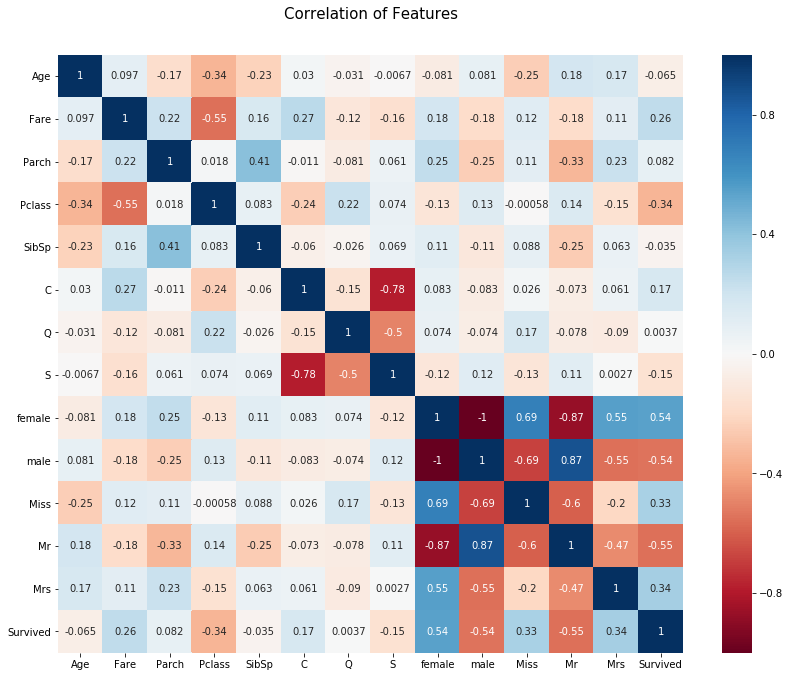

In [304]:
plt.figure(figsize=(14, 11)) 
sns.heatmap(df_train.corr(), annot=True, cmap="RdBu") 
plt.title('Correlation of Features', y=1.05, size=15)

### Create a Decision tree to observe important features

In [305]:
from sklearn.model_selection import train_test_split
x = df_train.drop(["Survived"], axis=1)
y = df_train["Survived"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [306]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 20) 
clf = clf.fit(xtrain, ytrain)

In [307]:
from sklearn.tree import export_graphviz 
import graphviz

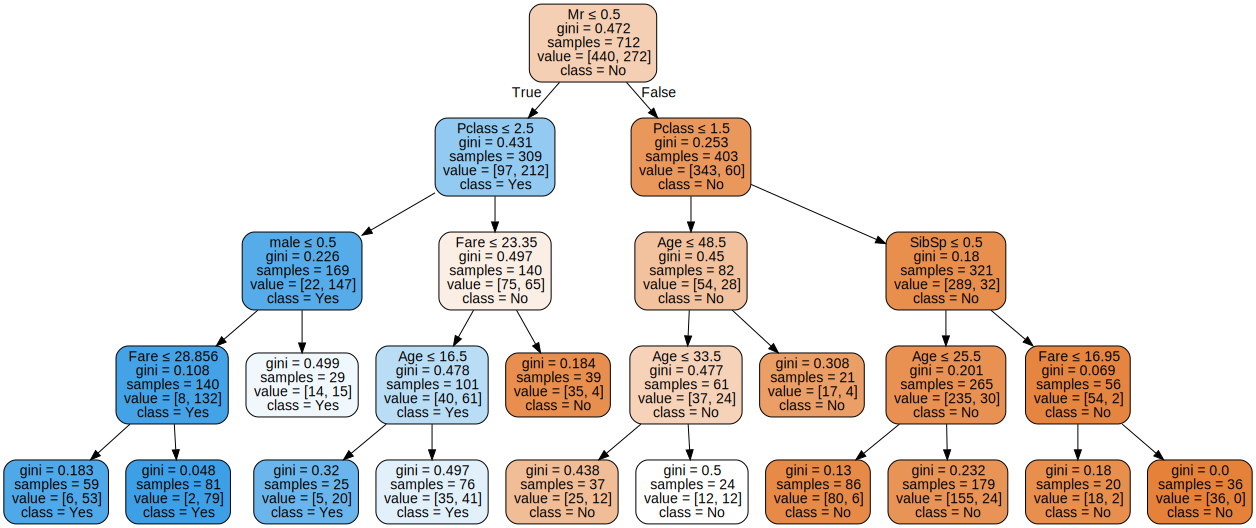

In [308]:
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=x.columns,
                           class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Machine Learning model 

### Random Forest 

In [309]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [310]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":range(20, 31), 
    "max_depth":range(5, 11)
}
clf = RandomForestClassifier()
g = GridSearchCV(clf, params, cv=10)
g.fit(x, y)
print(g.best_params_)
print(g.best_score_)

{'max_depth': 6, 'n_estimators': 26}
0.8383838383838383


In [312]:
clf = RandomForestClassifier(max_depth= 6, n_estimators= 26)
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [313]:
df_test.head()

,Age,Fare,Parch,Pclass,SibSp,C,Q,S,female,male,Miss,Mr,Mrs
0,34.5,7.8292,0,3,0,0,1,0,0,1,0,1,0
1,47.0,7.0000,0,3,1,0,0,1,1,0,0,0,1
2,62.0,9.6875,0,2,0,0,1,0,0,1,0,1,0
3,27.0,8.6625,0,3,0,0,0,1,0,1,0,1,0
4,22.0,12.2875,1,3,1,0,0,1,1,0,0,0,1


In [314]:
pre = clf.predict(df_test)
pre

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [315]:
resultdf = pd.DataFrame()
resultdf["PassengerId"] = testdf["PassengerId"]
resultdf["Survived"] = pre

In [316]:
resultdf.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [317]:
resultdf.to_csv("result.csv", encoding="utf-8", index=False)

In [318]:
# ls

In [319]:
from sklearn.linear_model import LogisticRegression

In [320]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x, y)
Y_pred = logreg.predict(df_test)
submission = pd.DataFrame({
        "PassengerId": testdf["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('LogisticRegression.csv', index=False)

In [321]:
# ls